---
---
### Lista de encabezados
1. Piezas del Vehículo:
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura maletro",
    28: "Moldura puerta delantera derecha",
    29: "Moldura puerta delantera izquierda",
    30: "Moldura puerta trasera derecha",
    31: "Moldura puerta trasera izquierda",
    32: "Parabrisas delantero",
    33: "Parabrisas trasero",
    34: "Parachoques delantero",
    35: "Parachoques trasero",
    36: "Puerta delantera derecha",
    37: "Puerta delantera izquierda",
    38: "Puerta trasera derecha",
    39: "Puerta trasera izquierda",
    40: "Rejilla, parrilla",
    41: "Rueda",
    42: "Tapa de combustible",
    43: "Tapa de rueda",
    44: "Techo",
    45: "Techo corredizo",
    46: "Ventana delantera derecha",
    47: "Ventana delantera izquierda",
    48: "Ventana trasera derecha",
    49: "Ventana trasera izquierda",
    50: "Ventanilla delantera derecha",
    51: "Ventanilla delantera izquierda",
    52: "Ventanilla trasera derecha",
    53: "Ventanilla trasera izquierda"

2. Tipos de Daño:
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"

3. Sugerencia:
    1:"Reparar", 
    2:"Reemplazar"

### Librerias necesarias:

- pip install pandas
- pip install scikit-learn
- pip install matplotlib
- pip install seaborn

pip install pandas scikit-learn imblearn seaborn torch torchvision

In [79]:
import pandas as pd
import ast
from collections import defaultdict
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

1. Diccionarios completos: Todos los mapeos completos para piezas, daños y sugerencias.

In [2]:
# =============================================
# 1. DICCIONARIOS COMPLETOS DE MAPEO (CORREGIDOS)
# =============================================
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

# Diccionario para Tipos de Daño (completo)
label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

# Diccionario para Sugerencia (completo)
label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

In [3]:
# Crear diccionarios inversos (texto -> número) 
cls_to_label_piezas = {v.lower().strip(): k for k, v in label_to_cls_piezas.items()}
cls_to_label_danos = {v.lower().strip(): k for k, v in label_to_cls_danos.items()}
cls_to_label_sugerencia = {v.lower().strip(): k for k, v in label_to_cls_sugerencia.items()}

2. Procesamiento robusto:
    - Limpieza de texto (minúsculas, eliminar espacios)
    - Manejo de valores compuestos (ej. "Abolladura-dent")
    - Manejo de errores y valores no encontrados

In [4]:
# =============================================
# 2. FUNCIONES DE PROCESAMIENTO
# =============================================

def limpiar_texto(texto):
    """Limpia y estandariza el texto para comparación"""
    if pd.isna(texto):
        return ""
    return texto.lower().strip()

def procesar_dano(texto):
    """Procesa la columna Tipos de Daño (maneja casos como 'Abolladura-dent')"""
    texto = limpiar_texto(texto)
    if '-' in texto:
        return texto.split('-')[0]
    return texto

def mapear_valor(texto, diccionario, columna):
    """Mapea texto a valor numérico con manejo de errores"""
    try:
        texto = limpiar_texto(texto)
        if columna == 'Tipos de Daño':
            texto = procesar_dano(texto)
        return diccionario.get(texto, -1)  # -1 para valores no encontrados
    except Exception as e:
        print(f"Error procesando valor: {texto} - {str(e)}")
        return -1

In [58]:
# Leer el archivo original
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145.csv', sep='|')

In [59]:
df.head()

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia
0,1.jpg,Abolladura,Guardabarros delantero derecho,Reparar
1,2.jpg,Abolladura,Parachoques trasero,Reparar
2,3.jpg,Rayón,Parachoques delantero,Reparar
3,4.jpg,Rotura,Rueda,Reparar
4,5.jpg,Rotura,Parabrisas trasero,Reemplazar


In [60]:
# =============================================
# 3. PROCESAR EL ARCHIVO CSV
# =============================================

# Aplicar el mapeo a cada columna
df['Tipos de Daño_encoded'] = df['Tipos de Daño'].apply(
    lambda x: mapear_valor(x, cls_to_label_danos, 'Tipos de Daño'))
df['Piezas del Vehículo_encoded'] = df['Piezas del Vehículo'].apply(
    lambda x: mapear_valor(x, cls_to_label_piezas, 'Piezas del Vehículo'))
df['Sugerencia_encoded'] = df['Sugerencia'].apply(
    lambda x: mapear_valor(x, cls_to_label_sugerencia, 'Sugerencia'))

# Verificar valores no mapeados (-1)
for col in ['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']:
    no_encontrados = df[df[f'{col}_encoded'] == -1][col].unique()
    if len(no_encontrados) > 0:
        print(f"\nADVERTENCIA: Valores no mapeados en {col}:")
        print(no_encontrados)

In [61]:
df.head(12)

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia,Tipos de Daño_encoded,Piezas del Vehículo_encoded,Sugerencia_encoded
0,1.jpg,Abolladura,Guardabarros delantero derecho,Reparar,1,11,1
1,2.jpg,Abolladura,Parachoques trasero,Reparar,1,34,1
2,3.jpg,Rayón,Parachoques delantero,Reparar,5,33,1
3,4.jpg,Rotura,Rueda,Reparar,6,40,1
4,5.jpg,Rotura,Parabrisas trasero,Reemplazar,6,32,2
5,6.jpg,Rayón,Parachoques trasero,Reparar,5,34,1
6,7.jpg,Rotura,Parabrisas delantero,Reemplazar,6,31,2
7,8.jpg,Rotura,Parabrisas delantero,Reemplazar,6,31,2
8,9.jpg,Deformación,Capó,Reparar,2,3,1
9,9.jpg,Deformación,Guardabarros delantero izquierdo,Reparar,2,12,1


In [62]:
# =============================================
# 4. CREAR NUEVO CSV CON ETIQUETAS
# =============================================
### Implementación técnica:
# Seleccionar y renombrar columnas
df_encoded = df[[
    'Imagen',
    'Tipos de Daño_encoded',
    'Piezas del Vehículo_encoded',
    'Sugerencia_encoded'
]].rename(columns={
    'Tipos de Daño_encoded': 'dannos',
    'Piezas del Vehículo_encoded': 'partes',
    'Sugerencia_encoded': 'sugerencias'
})

# Guardar el nuevo archivo CSV
## f_encoded.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv', index=False, sep='|')
df_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv', index=False, sep='|')


print("\nProceso completado exitosamente!")
print(f"Archivo original: {len(df)} registros")
print(f"Archivo codificado: {len(df_encoded)} registros")
print("Nuevo archivo guardado como: data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv")


Proceso completado exitosamente!
Archivo original: 1832 registros
Archivo codificado: 1832 registros
Nuevo archivo guardado como: data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv


In [63]:
df_encoded.head(15)

,Imagen,dannos,partes,sugerencias
0,1.jpg,1,11,1
1,2.jpg,1,34,1
2,3.jpg,5,33,1
3,4.jpg,6,40,1
4,5.jpg,6,32,2
5,6.jpg,5,34,1
6,7.jpg,6,31,2
7,8.jpg,6,31,2
8,9.jpg,2,3,1
9,9.jpg,2,12,1


In [64]:
# Manejar imágenes con múltiples registros (como 9.jpg, 15.jpg)
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'Tipos de Daño': [],
        'Piezas del Vehículo': [],
        'Sugerencia': []
    }
    
    for col in result.keys():
        ## unique_values = group[col].dropna().unique()
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado_etiquetas = (
    df.groupby('Imagen', group_keys=False)
    [['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)
# Guardar el nuevo archivo CSV
## df_consolidado_etiquetas.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas.csv', index=False, sep='|')
df_consolidado_etiquetas.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas.csv', index=False, sep='|')

In [65]:
df_consolidado_etiquetas.head()

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia
0,1.jpg,[Abolladura],[Guardabarros delantero derecho ],[Reparar]
1,10.jpg,[Rotura],[Parabrisas delantero],[Reemplazar]
2,100.jpg,"[Deformación, Rotura, Rotura]","[Guardabarros delantero derecho , Faros derech...","[Reparar, Reemplazar, Reparar]"
3,1000.jpg,[Rayón],[Parachoques delantero],[Reparar]
4,1001.jpg,"[Abolladura, Fractura, Rotura]","[Maletero, Parachoques trasero, Luz trasera iz...","[Reparar, Reparar, Reemplazar]"


In [66]:
# Manejar imágenes con múltiples registros (como 9.jpg, 15.jpg)
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'dannos': [],
        'partes': [],
        'sugerencias': []
    }
    
    for col in result.keys():
        ## unique_values = group[col].dropna().unique()
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado_encoded = (
    df_encoded.groupby('Imagen', group_keys=False)
    [['dannos', 'partes', 'sugerencias']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)

# Guardar el nuevo archivo CSV
## df_consolidado_encoded.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv', index=False, sep='|')
df_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv', index=False, sep='|')

In [67]:
df_consolidado_encoded.head()

,Imagen,dannos,partes,sugerencias
0,1.jpg,[1],[11],[1]
1,10.jpg,[6],[31],[2]
2,100.jpg,"[2, 6, 6]","[11, 9, 33]","[1, 2, 1]"
3,1000.jpg,[5],[33],[1]
4,1001.jpg,"[1, 4, 6]","[21, 34, 20]","[1, 1, 2]"


In [18]:
# Antes de crear el Dataset, verifica datos inconsistentes
def check_data_consistency(df):
    # Verificar partes no definidas
    undefined_parts = set()
    for parts_list in df['partes']:
        for part in parts_list:
            if part not in cls_to_label_piezas:
                undefined_parts.add(part)
    
    # Verificar daños no definidos
    undefined_damages = set()
    for damages_list in df['dannos']:
        for damage in damages_list:
            if damage not in cls_to_label_danos:
                undefined_damages.add(damage)
    
    # Verificar sugerencias no definidas
    undefined_suggestions = set()
    for suggestions_list in df['sugerencias']:
        for sug in suggestions_list:
            if sug not in cls_to_label_sugerencia:
                undefined_suggestions.add(sug)
    
    print("\nPartes no definidas encontradas:", undefined_parts)
    print("Daños no definidos encontrados:", undefined_damages)
    print("Sugerencias no definidas encontradas:", undefined_suggestions)

In [19]:
check_data_consistency(df_consolidado_encoded)


Partes no definidas encontradas: {1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 45, 46, 47, 48, 50, 51, 52}
Daños no definidos encontrados: {1, 2, 3, 4, 5, 6}
Sugerencias no definidas encontradas: {1, 2}


In [68]:
# Leer el archivo encoded
df_consolidado_encoded = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv', sep='|')

In [69]:
df_consolidado_encoded.head()

,Imagen,dannos,partes,sugerencias
0,1.jpg,[1],[11],[1]
1,10.jpg,[6],[31],[2]
2,100.jpg,"[2, 6, 6]","[11, 9, 33]","[1, 2, 1]"
3,1000.jpg,[5],[33],[1]
4,1001.jpg,"[1, 4, 6]","[21, 34, 20]","[1, 1, 2]"


In [70]:
# =============================================
# Convertir string a lista
# =============================================
def convert_string_lists(df):
    # Aplicar literal_eval a las columnas relevantes
    df['partes'] = df['partes'].apply(ast.literal_eval)
    df['dannos'] = df['dannos'].apply(ast.literal_eval)
    df['sugerencias'] = df['sugerencias'].apply(ast.literal_eval)
    return df

# Aplicar a todos tus datasets
multi_consolidado_encoded = convert_string_lists(df_consolidado_encoded)

In [71]:
multi_consolidado_encoded.head()

,Imagen,dannos,partes,sugerencias
0,1.jpg,[1],[11],[1]
1,10.jpg,[6],[31],[2]
2,100.jpg,"[2, 6, 6]","[11, 9, 33]","[1, 2, 1]"
3,1000.jpg,[5],[33],[1]
4,1001.jpg,"[1, 4, 6]","[21, 34, 20]","[1, 1, 2]"


In [72]:
# Guardar el nuevo archivo CSV
## multi_consolidado_encoded.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', index=False, sep='|')
multi_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', index=False, sep='|')

In [32]:
check_data_consistency(multi_consolidado_encoded)


Partes no definidas encontradas: {1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 45, 46, 47, 48, 50, 51, 52}
Daños no definidos encontrados: {1, 2, 3, 4, 5, 6}
Sugerencias no definidas encontradas: {1, 2}


In [73]:
# Configuración
SEED = 42
TEST_SIZE = 0.2  # 20% para prueba
VAL_SIZE = 0.25  # 25% del entrenamiento para validación (20% del total)

# Leer el archivo encoded
df_consolidado_encoded = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', sep='|')

In [ ]:
# Se verifica las etiquetas únicas en los datos 
print("Partes únicas en los datos:", df_consolidado_encoded['partes'].unique())
print("Daños únicos en los datos:", df_consolidado_encoded['dannos'].unique())
print("Sugerencias únicas en los datos:", df_consolidado_encoded['sugerencias'].unique())

In [74]:
# 3. Dividir los datos
# Primero dividimos en entrenamiento+validación (80%) y prueba (20%)
train_val_df, test_df = train_test_split(
    df_consolidado_encoded,
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=df_consolidado_encoded['sugerencias'].apply(lambda x: x[0])  # Estratificar por primera sugerencia
)

In [75]:
print(train_val_df.info())
print(test_df.info())
print(train_val_df.describe())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 926 to 941
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Imagen       916 non-null    object
 1   dannos       916 non-null    object
 2   partes       916 non-null    object
 3   sugerencias  916 non-null    object
dtypes: object(4)
memory usage: 35.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 647 to 1113
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Imagen       229 non-null    object
 1   dannos       229 non-null    object
 2   partes       229 non-null    object
 3   sugerencias  229 non-null    object
dtypes: object(4)
memory usage: 8.9+ KB
None
         Imagen dannos partes sugerencias
count       916    916    916         916
unique      916     82    209          33
top     815.jpg    [6]   [33]         [1]
freq          1    238    132         406
    

In [76]:
# Luego dividimos el entrenamiento en entrenamiento (60%) y validación (20%)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=VAL_SIZE/(1-TEST_SIZE),  # Ajustar para que sea 20% del total
    random_state=SEED,
    stratify=train_val_df['sugerencias'].apply(lambda x: x[0])
)

In [77]:
print(train_df.info())
print(val_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 661 to 101
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Imagen       629 non-null    object
 1   dannos       629 non-null    object
 2   partes       629 non-null    object
 3   sugerencias  629 non-null    object
dtypes: object(4)
memory usage: 24.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 181 to 382
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Imagen       287 non-null    object
 1   dannos       287 non-null    object
 2   partes       287 non-null    object
 3   sugerencias  287 non-null    object
dtypes: object(4)
memory usage: 11.2+ KB
None


In [78]:
# 5. Guardar los conjuntos de datos
os.makedirs('data/fotos_siniestros/datasets', exist_ok=True)

train_df.to_csv('data/fotos_siniestros/datasets/multi_train.csv', index=False, sep='|')
val_df.to_csv('data/fotos_siniestros/datasets/multi_val.csv', index=False, sep='|')
test_df.to_csv('data/fotos_siniestros/datasets/multi_test.csv', index=False, sep='|')

For generating important graphs including a confusion matrix:

Since this is a multi-label problem, a standard confusion matrix for single-label classification won't directly apply.
We can generate:
Distribution plots of labels (parts, damages, suggestions) to understand class balance.
Multi-label confusion matrices or per-class confusion matrices if predictions are available.
Other useful plots like label co-occurrence heatmaps, bar charts of label frequencies.
The notebook currently does not show model training or predictions, so confusion matrix code would require predicted labels and true labels.
I can provide code snippets for:
Visualizing label distributions in the dataset.
How to plot confusion matrices if predictions are available (with example dummy data or placeholders).
Other relevant graphs for multi-label data.
Plan:

Add code to import necessary plotting libraries (matplotlib, seaborn).
Add code to plot label distribution histograms/bar charts for parts, damages, and suggestions.
Add example code to plot confusion matrix for one label type assuming predictions and true labels are available.
Provide comments on how to adapt confusion matrix plotting for multi-label classification.
Keep the code modular and easy to integrate into the existing notebook.

In [98]:
# Label maps from your notebook
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

def convert_string_lists(df):
    for col in ['dannos', 'partes', 'sugerencias']:
        df[col] = df[col].apply(ast.literal_eval)
    return df

def plot_label_distribution(df, column, label_map, title):
    all_labels = []
    for labels_list in df[column]:
        all_labels.extend(labels_list)
    label_counts = pd.Series(all_labels).value_counts().sort_index()
    label_names = [label_map.get(i, f"Label {i}") for i in label_counts.index]
    plt.figure(figsize=(12,6))
    sns.barplot(x=label_names, y=label_counts.values, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Cantidad de ocurrencias")
    plt.xlabel("Etiquetas")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_246731/2799848009.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


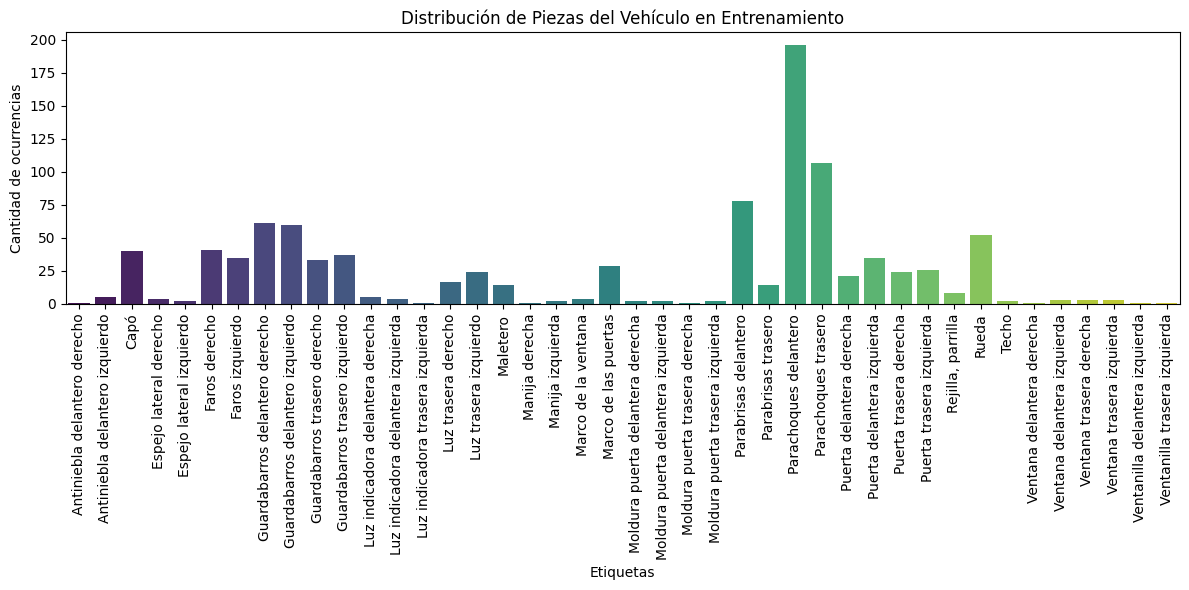

/tmp/ipykernel_246731/2799848009.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


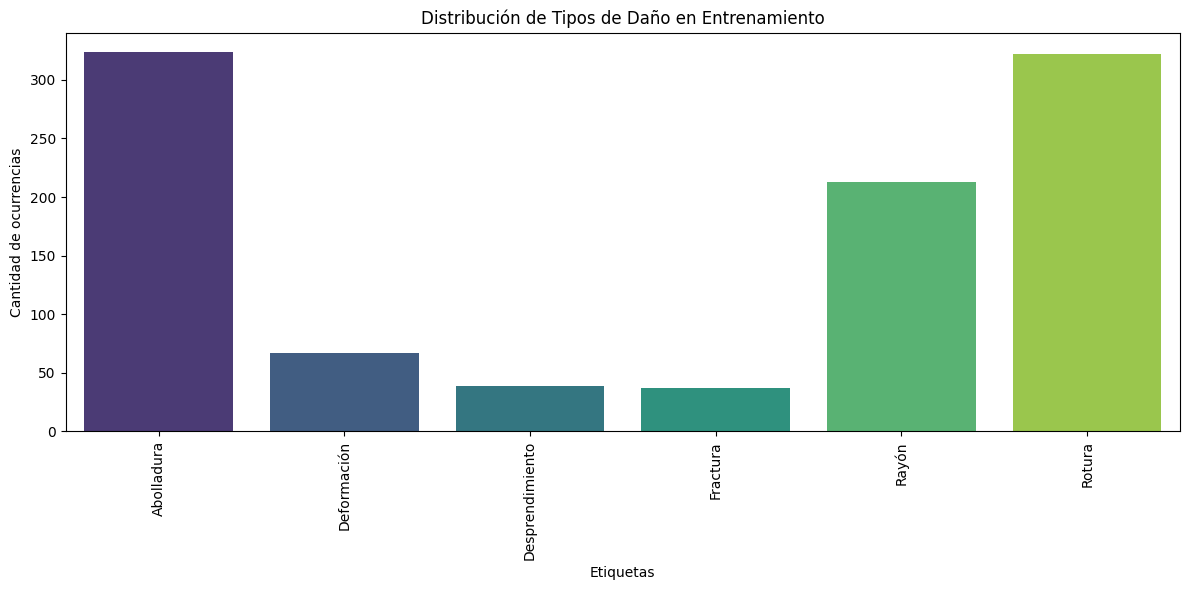

/tmp/ipykernel_246731/2799848009.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


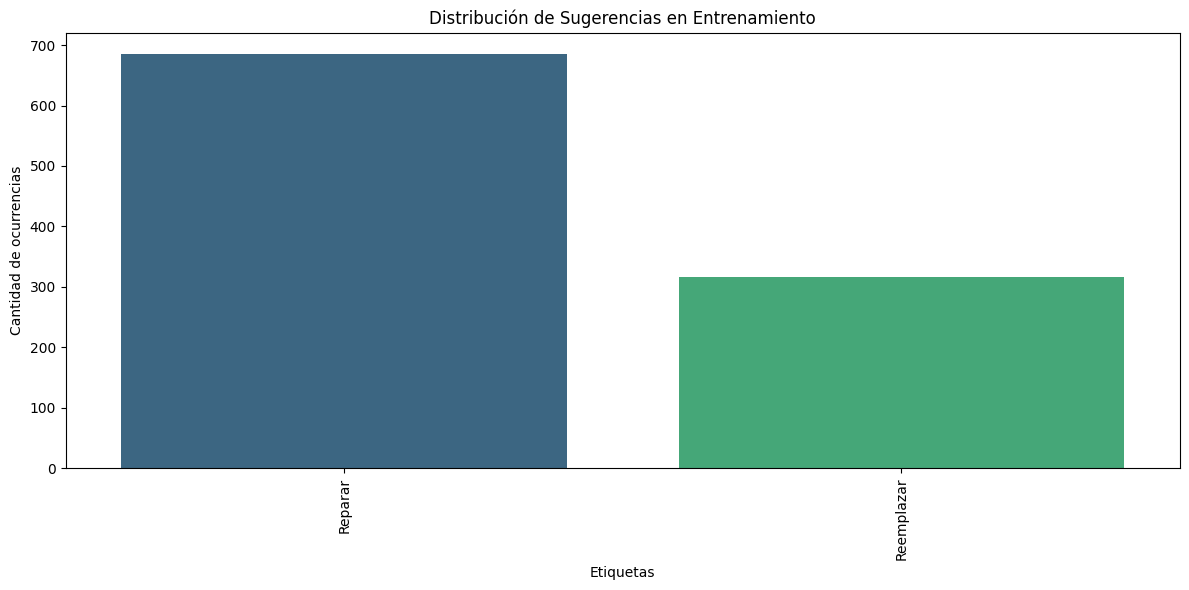

In [99]:
# Load datasets
train_df = pd.read_csv('data/fotos_siniestros/datasets/multi_train.csv', sep='|')
val_df = pd.read_csv('data/fotos_siniestros/datasets/multi_val.csv', sep='|')
test_df = pd.read_csv('data/fotos_siniestros/datasets/multi_test.csv', sep='|')

# Convert string lists to actual lists
train_df = convert_string_lists(train_df)
val_df = convert_string_lists(val_df)
test_df = convert_string_lists(test_df)

# Plot label distributions for training set
plot_label_distribution(train_df, 'partes', label_to_cls_piezas, "Distribución de Piezas del Vehículo en Entrenamiento")
plot_label_distribution(train_df, 'dannos', label_to_cls_danos, "Distribución de Tipos de Daño en Entrenamiento")
plot_label_distribution(train_df, 'sugerencias', label_to_cls_sugerencia, "Distribución de Sugerencias en Entrenamiento")

/tmp/ipykernel_246731/2799848009.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


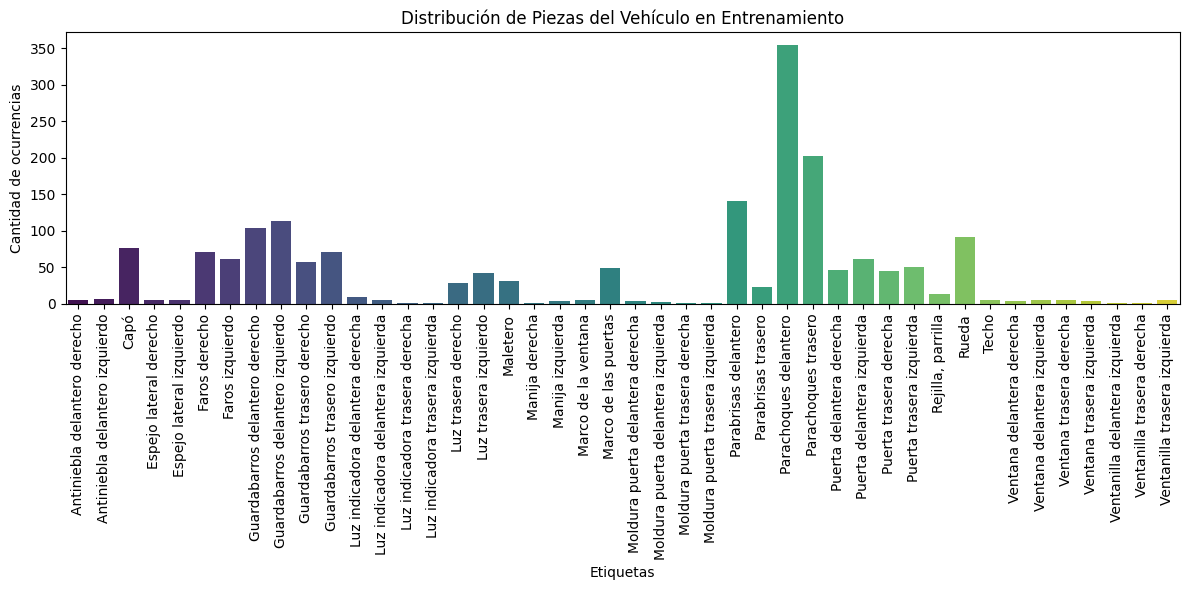

/tmp/ipykernel_246731/2799848009.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


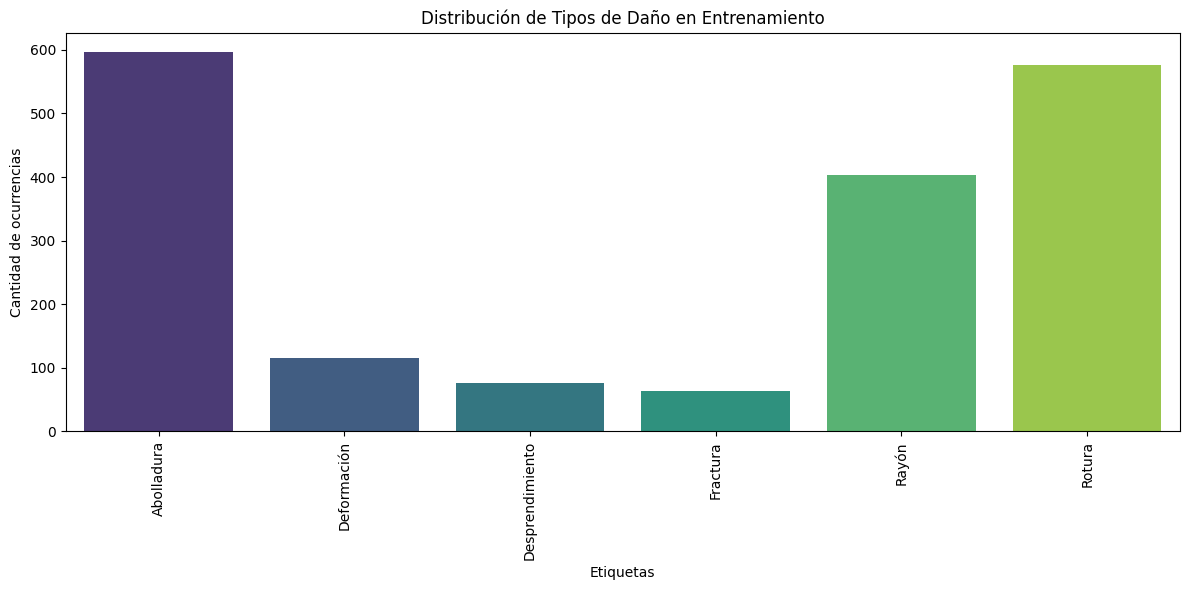

/tmp/ipykernel_246731/2799848009.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


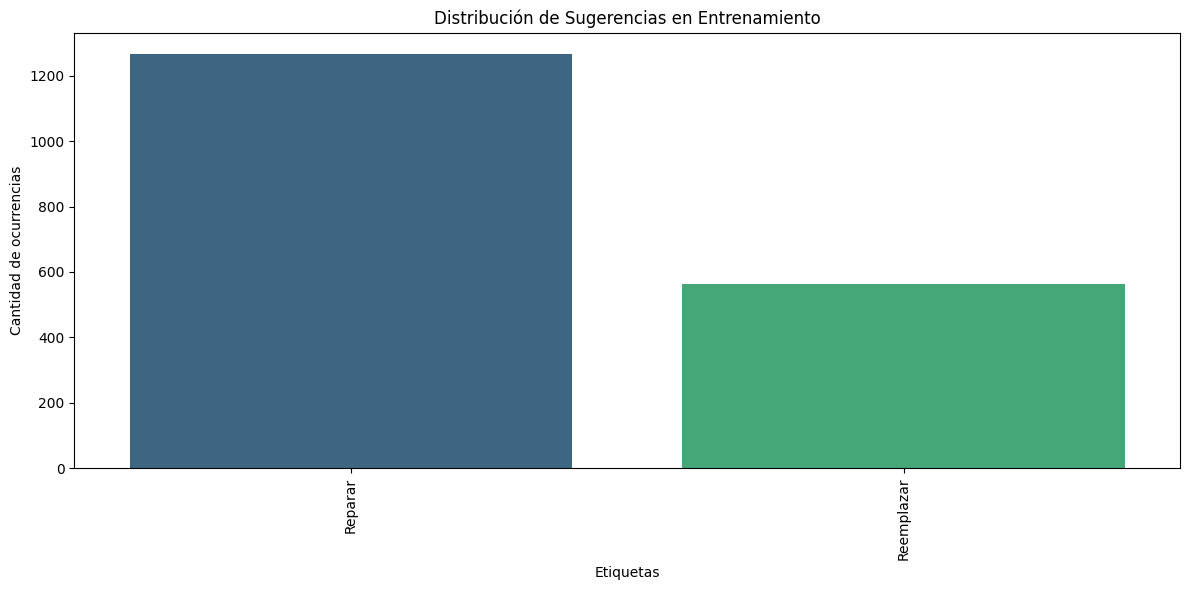

In [100]:
# Load datasets
multi_encoded_df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', sep='|')

# Convert string lists to actual lists
multi_encoded_df = convert_string_lists(multi_encoded_df)

# Plot label distributions for training set
plot_label_distribution(multi_encoded_df, 'partes', label_to_cls_piezas, "Distribución de Piezas del Vehículo en Entrenamiento")
plot_label_distribution(multi_encoded_df, 'dannos', label_to_cls_danos, "Distribución de Tipos de Daño en Entrenamiento")
plot_label_distribution(multi_encoded_df, 'sugerencias', label_to_cls_sugerencia, "Distribución de Sugerencias en Entrenamiento")

---
---
Solo para ejemplo

In [ ]:
def plot_confusion_matrix_multilabel(y_true, y_pred, class_names):
    for i, class_name in enumerate(class_names):
        cm = confusion_matrix([y[i] for y in y_true], [y[i] for y in y_pred])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
        disp.plot()
        plt.title(f"Matriz de Confusión para clase: {class_name}")
        plt.show()

def multilabel_to_binary_indicator(label_lists, num_classes):
    """
    Convert list of label indices per sample to binary indicator matrix.
    label_lists: list of lists, each inner list contains label indices for a sample
    num_classes: total number of classes
    Returns: numpy array of shape (num_samples, num_classes) with 0/1 indicators
    """
    binary_matrix = np.zeros((len(label_lists), num_classes), dtype=int)
    for i, labels in enumerate(label_lists):
        for label in labels:
            if 0 <= label-1 < num_classes:  # assuming labels start at 1
                binary_matrix[i, label-1] = 1
    return binary_matrix

# Number of damage classes
num_danos = len(label_to_cls_danos)
num_partes = len(label_to_cls_piezas)
num_sugerencia = len(label_to_cls_sugerencia)

# Convert true labels to binary indicator
y_dannos = multilabel_to_binary_indicator(test_df['dannos'], num_danos)
y_partes = multilabel_to_binary_indicator(test_df['partes'], num_partes)
y_sugerencias = multilabel_to_binary_indicator(test_df['sugerencias'], num_sugerencia)

# Class names
class_names_dannos = list(label_to_cls_danos.values())
class_names_partes = list(label_to_cls_piezas.values())
class_names_sugerencias = list(label_to_cls_sugerencia.values())


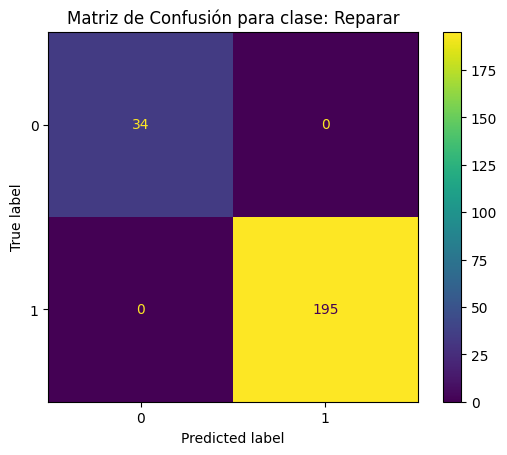

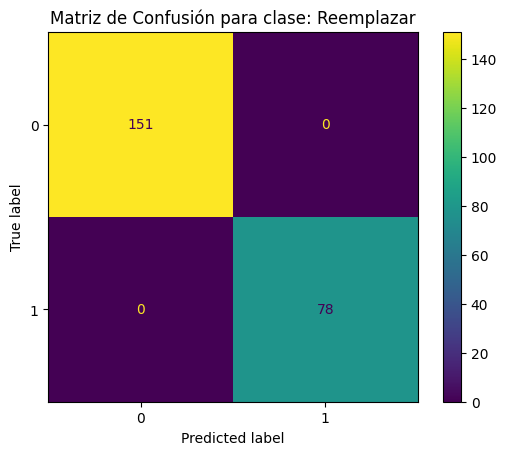

In [97]:
plot_confusion_matrix_multilabel(y_sugerencias.tolist(), y_sugerencias.tolist(), class_names_sugerencias)

---
---